## D 점멸 vs F 점멸
D 점멸 vs F 점멸, 어떤게 더 좋은지 데이터 분석으로 알아보자.

### 데이터셋 개요
출처: Kaggle, "League of Legends Ranked Matches"
링크: https://www.kaggle.com/datasets/paololol/league-of-legends-ranked-matches?select=participants.csv

위 데이터를 통해 데이터 분석 연습하기

In [3]:
# 필요한 라이브러리 설치
!pip install pandas
!pip install seaborn matplotlib

먼저 롤 유저들의 정보를 나타내는 pariciapnts.csv 파일을 로드합니다.

In [2]:
import pandas as pd

# CSV 파일에서 데이터 로드
file_path = 'data/participants.csv'
data = pd.read_csv(file_path)

# 데이터셋의 처음 몇 행을 표시
data.head()

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID


'ss1'는 D에 어떤 스펠을 쓰는지
'ss2'는 F에 어떤 스펠을 쓰는지

점멸(Flash)의 index는 4이다.

따라서 총 유저들 중에 D점멸을 사용하는 비율, F점멸을 사용하는 비율을 계산해준다.

In [4]:
# 'ss1'과 'ss2' 칼럼에서 값이 4인 경우의 분포 분석

# 'ss1'과 'ss2'에서 값이 4인 경우의 발생 횟수 계산
ss1_count = (data['ss1'] == 4).sum()
ss2_count = (data['ss2'] == 4).sum()

# 전체 데이터 엔트리 수
total_entries = len(data)

# ss1과 ss2에서 값이 4인 비율(백분율) 계산
ss1_distribution = (ss1_count / total_entries) * 100
ss2_distribution = (ss2_count / total_entries) * 100

ss1_distribution, ss2_distribution

(54.57356692758869, 42.617850990994924)

'stats1.csv'와 'stats2.csv'

두 개의 데이터 파일을 로드

각각의 게임을 나타냄.

In [5]:
# 추가 CSV 파일 로드를 위한 경로 설정
file_path_stats1 = 'data/stats1.csv'
file_path_stats2 = 'data/stats2.csv'

# CSV 파일 로드
stats1 = pd.read_csv(file_path_stats1)
stats2 = pd.read_csv(file_path_stats2)

# 각 데이터셋의 처음 몇 행을 표시하여 구조 이해
stats1.head(), stats2.head()

/tmp/ipykernel_45446/3977203653.py:7: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  stats2 = pd.read_csv(file_path_stats2)


(   id  win  item1  item2  item3  item4  item5  item6  trinket  kills  ...  \
 0   9    0   3748   2003   3111   3053   1419   1042     3340      6  ...   
 1  10    0   2301   3111   3190   3107      0      0     3364      0  ...   
 2  11    0   1055   3072   3006   3031   3046   1036     3340      7  ...   
 3  12    0   1029   3078   3156   1001   3053      0     3340      5  ...   
 4  13    0   3020   1058   3198   3102   1052   1026     3340      2  ...   
 
    neutralminionskilled  ownjunglekills  enemyjunglekills  totcctimedealt  \
 0                    69              42                27             610   
 1                     1               1                 0             211   
 2                     3               1                 2             182   
 3                     6               6                 0             106   
 4                     4               3                 1             159   
 
    champlvl  pinksbought  wardsbought  wardsplaced  wardski

경기 결과 파일이 2개로 나뉘어져 있기 때문이 이를 하나로 병합

In [6]:
# 두 파일이 동일한 칼럼을 가지고 있으므로, 단순히 이어붙임으로써 병합
merged_data = pd.concat([stats1, stats2], ignore_index=True)

# 병합된 데이터셋의 처음과 끝 몇 행을 표시하여 병합 확인
merged_data.head(), merged_data.tail()

(   id  win  item1  item2  item3  item4  item5  item6  trinket  kills  ...  \
 0   9    0   3748   2003   3111   3053   1419   1042     3340      6  ...   
 1  10    0   2301   3111   3190   3107      0      0     3364      0  ...   
 2  11    0   1055   3072   3006   3031   3046   1036     3340      7  ...   
 3  12    0   1029   3078   3156   1001   3053      0     3340      5  ...   
 4  13    0   3020   1058   3198   3102   1052   1026     3340      2  ...   
 
    neutralminionskilled  ownjunglekills  enemyjunglekills  totcctimedealt  \
 0                    69              42                27             610   
 1                     1               1                 0             211   
 2                     3               1                 2             182   
 3                     6               6                 0             106   
 4                     4               3                 1             159   
 
    champlvl  pinksbought  wardsbought  wardsplaced  wardski

### 승률을 계산

In [7]:
# 'ss1'이 4인 플레이어와 'ss2'가 4인 플레이어 필터링
ss1_players = data[data['ss1'] == 4]
ss2_players = data[data['ss2'] == 4]

# 필터링된 데이터를 승/패 기록이 포함된 통계 데이터와 병합
ss1_stats = pd.merge(ss1_players, merged_data[['id', 'win']], on='id')
ss2_stats = pd.merge(ss2_players, merged_data[['id', 'win']], on='id')

# 승률 계산
ss1_win_rate = ss1_stats['win'].mean()  # D 점멸
ss2_win_rate = ss2_stats['win'].mean()  # F 점멸

ss1_win_rate, ss2_win_rate

(0.5003111387678905, 0.4996725639267771)

### 데이터 시각화

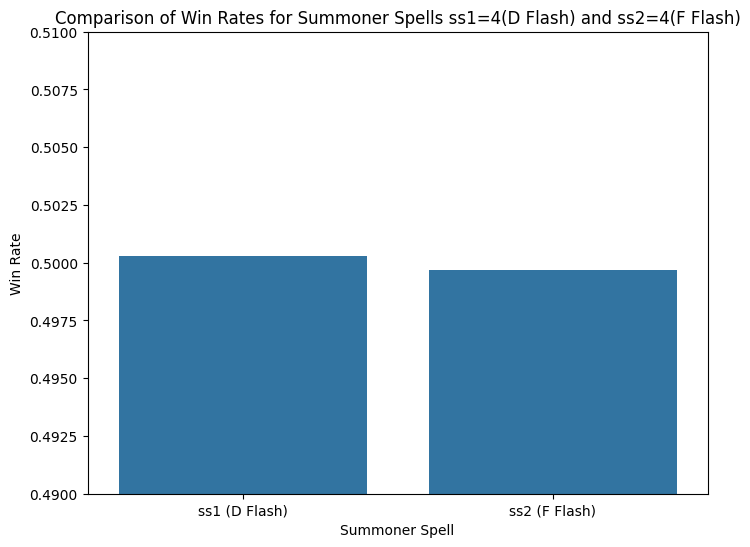

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화를 위한 데이터 준비
win_rates = pd.DataFrame({
    "Summoner Spell": ["ss1 (D Flash)", "ss2 (F Flash)"],
    "Win Rate": [ss1_win_rate, ss2_win_rate]
})

# Seaborn을 사용하여 승률 그래프 그리기
plt.figure(figsize=(8, 6))
sns.barplot(x="Summoner Spell", y="Win Rate", data=win_rates)
plt.title("Comparison of Win Rates for Summoner Spells ss1=4(D Flash) and ss2=4(F Flash)")
plt.ylabel("Win Rate")
plt.ylim(0.49, 0.51)  # 작은 차이를 더 잘 시각화하기 위해 범위 설정
plt.show()